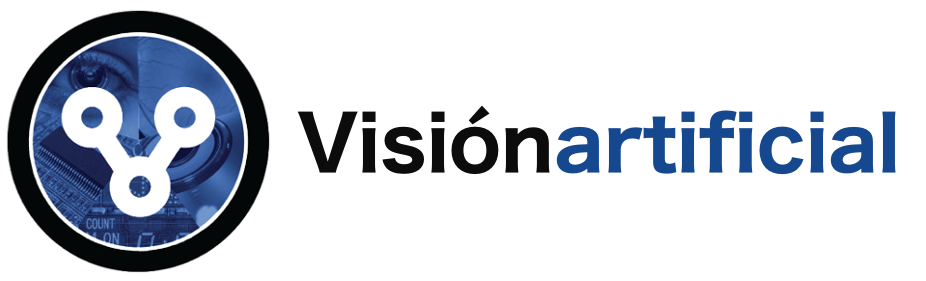

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Descriptor SIFT</font>

Se lembras o caderno sobre detectores de puntos clave, lembrarás que os descritores de características locais divídense en dúas fases.

- A primeira fase identifica rexións interesantes e salientables dunha imaxe que deben ser descritas e cuantificadas. Estas rexións chámanse puntos clave e poden corresponder a bordes, esquinas ou estruturas tipo "blob" dunha imaxe.

- Despois de identificar o conxunto de puntos clave nunha imaxe, necesitamos extraer e cuantificar a rexión que rodea cada punto clave. O vector de características asociado a un punto clave chámase característica ou característica local xa que só se inclúe a veciñanza local que rodea o punto clave no cálculo do descritor.

Existen moitos métodos para usar algoritmos para extraer características locais dunha imaxe, pero comezaremos polo máis popular: **SIFT**.


## <font style="color:rgb(50,120,229)">Obxectivos</font>

Os obxectivos principais son:

- Comprender como funciona o descritor de funcións SIFT.
- Usar OpenCV para extraer vectores de características SIFT dunha imaxe.
     
     
## <font style="color:rgb(50,120,229)">Como funciona SIFT?</font>     
     
   
Agora que sabemos como se achan os puntos clave (sección de Detectores), podemos pasar á fase na que realmente describimos e cuantificamos a rexión da imaxe que rodea o punto clave.

Afortunadamente, o descritor SIFT é en realidade moito máis fácil de entender que o detector de puntos clave Difference of Gaussian (DoG) proposto tamén por David Lowe no seu artigo ICCV de 1999, [Object recognition from local scale-invariant features.](../artigos/lowe_1999.pdf)

O algoritmo de descrición da función SIFT require un conxunto de puntos clave de entrada. Despois, para cada un dos puntos clave de entrada, SIFT toma a rexión de **16 x 16 píxeles** que rodea o píxel central da rexión do punto clave:

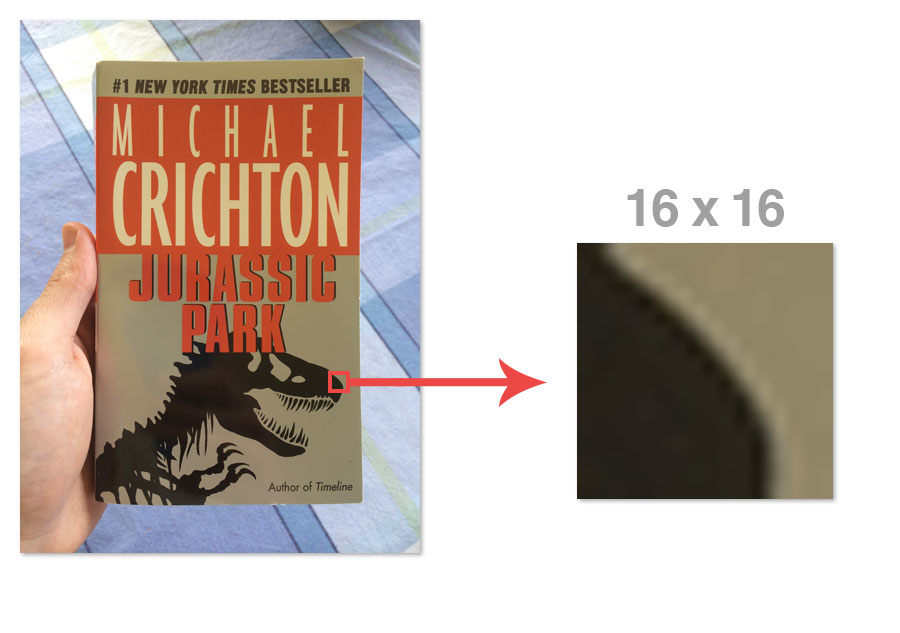
A partir de aí, dividimos a rexión de 16 x 16 píxeles en dezaseis ventás de 4 x 4 píxeles:

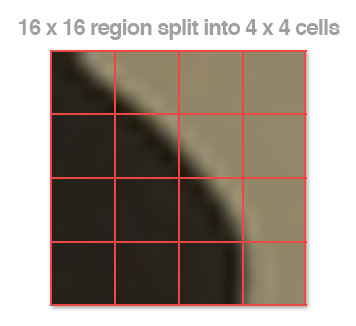
Agora podemos pasar ao segundo paso de SIFT, que é o máis complicado. Para cada unha das 16 fiestras, calculamos a magnitude e orientación do gradiente, do mesmo xeito que fixemos para o descritor HOG:


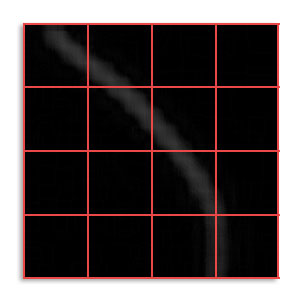

Dada a magnitude e orientación do gradiente, a continuación construímos un histograma de 8 bins para cada unha das fiestras de 4 x 4 píxeles:

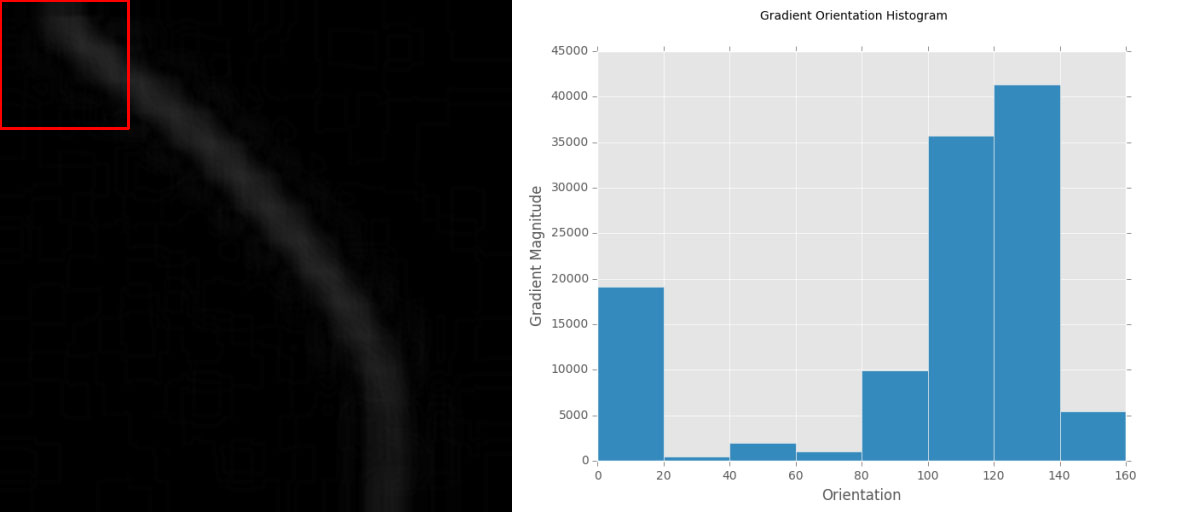
A cantidade engadida a cada bin depende da magnitude do gradiente. Non obstante, non imos utilizar a magnitude bruta do gradiente. En cambio, imos utilizar a ponderación gaussiana. Canto máis lonxe estea o píxel do centro do punto clave, menos contribúe ao histograma global.

Finalmente, o terceiro paso de SIFT é recoller os 16 destes histogramas de orientación de 8 bins e concatenalos xuntos:

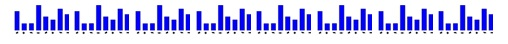

Dado que temos 16 destes histogramas, o noso vector de características é: 16 x 8 = 128-dim.

Unha vez que recollemos os histogramas concatenados, acabamos normalizando L2 todo o vector de características. Neste punto, o noso vector de características SIFT está rematado e listo para ser comparado con outros vectores de características SIFT.

De novo, é importante ter en conta que, a diferenza dos descritores de imaxes globais, como os HoG ou a textura Haralick (onde temos só un vector de características extraídas por imaxe), os descritores locais devolven N vectores de características por imaxe, onde N é o número de puntos clave detectados. Isto implica que dados N puntos clave detectados na nosa imaxe de entrada, obteremos N x 128-d vectores de características despois de aplicar SIFT.


## <font style="color:rgb(50,120,229)">Vexamos estas ideas en acción ...</font>

Manteño este exemplo en particular breve xa que máis adiante analizaremos a extracción e a coincidencia de descritores SIFT.

In [3]:
# importamos paquetes
from __future__ import print_function
import argparse
import cv2
import imutils

args={"image":"../dataset/jp_01.png"}

# cargamos a imaxe e pasamola a gris
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializamos o detector para opencv 3+
detector = cv2.SIFT_create()

# detectamos os puntos de interese e achamos sobre eles os descritores SIFT
(kps, descs) = detector.detectAndCompute(gray, None)

# Visualizamos os puntos detectados e a forma dos vectores de caracteristicas
print("[INFO] # de keypoints detectados: {}".format(len(kps)))
print("[INFO] dimensions do vector de caracteristicas: {}".format(descs.shape))

[INFO] # de keypoints detectados: 522
[INFO] dimensions do vector de caracteristicas: (522, 128)
